## Generating Data Base On Equations

$$\alpha = \frac{0.01(V+55)}{1-e^{-(\frac{V+55}{10})}}$$
$$\hspace{1cm}$$
$$\beta = 0.125e^{-(\frac{V+65}{80})}$$
$$\hspace{1cm}$$
$$\tau = \frac{1}{\alpha + \beta}$$
$$\hspace{1cm}$$
$$n_\infty = \frac{\alpha}{\alpha + \beta}$$
$$\hspace{1cm}$$
$$n = n_\infty(1-e^{\frac{-t}{\tau}})$$
$$I_k = G_L(V-E_L) + \hat{g}_k * n^4(V-E_k)$$


In [38]:
#Import for Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Define Constants For Equations
t = 0
V = 0
GK_HAT = 24 * 31
EK = -77
EL = -30
GL = 0.3

W1 = 0.01
W2 = 55
W3 = 10
U1 = 0.125
U2 = 65
U3 = 80

def alpha(V):
    return W1*(V + W2)/(1 - np.exp(-(V + W2) / W3))
def beta(V):
    return U1 * np.exp(-(V + U2) / U3)

In [40]:
V_ARR_SIZE = 18
TIMES_SIZE = 3000
V_ARR = [-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80]
TIMES = np.linspace(0,0.003, num=TIMES_SIZE)

In [41]:
Matrix = np.zeros(TIMES_SIZE*V_ARR_SIZE, dtype=float)
Matrix.shape=(TIMES_SIZE,V_ARR_SIZE)
i = 0 
j = 0
for V in V_ARR:
    for t in TIMES:
        tau = 1 / (alpha(V) + beta(V))
        n_inf = alpha(V) / (alpha(V) + beta(V))
        n = n_inf * (1 - np.exp(-t/tau))
        Ik = GK_HAT * np.power(n , 4) * (1 - np.exp(-t/tau)) * (V - EK)
        Im = GL * (V - EL) + Ik
        Matrix[j,i] = float(Im)
        j+=1
    j = 0
    i += 1

In [42]:
df = pd.DataFrame(Matrix)

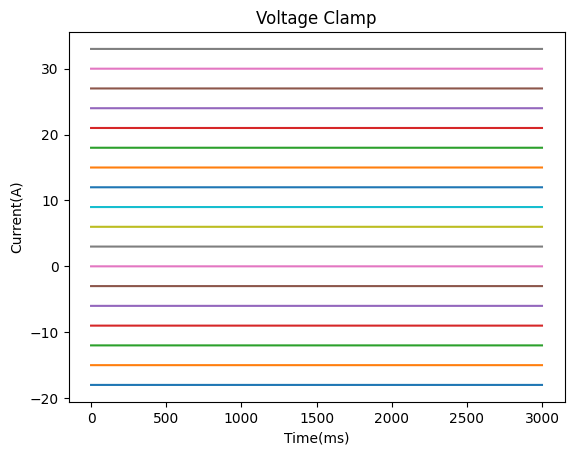

In [43]:

plt.title("Voltage Clamp")
plt.xlabel("Time(ms)")
plt.ylabel("Current(A)")
plt.plot(df);